In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Nithya\OneDrive\Documents\companies_cleaned_data.csv")
data

,Name,Rating,Highly Rated For,Critically Rated For,Reviews,Salaries,Interviews,Jobs
0,TCS,3.8,"Job Security, Work Life Balance, Company Cult...","Promotions / Appraisal, Salary & Benefits",67800,739300,5700,473
1,Accenture,4.0,"Company Culture, Job Security, Skill Developme...",Not Available,43200,514500,400,5100
2,Cognizant,3.9,Skill Development / Learning,Not Available,38900,497800,3400,562
3,Wipro,3.8,Job Security,Not Available,3600,371700,3400,346
4,ICICI Bank,4.0,"Job Security, Skill Development / Learning, Co...",Not Available,31300,136600,1800,215
...,...,...,...,...,...,...,...,...
495,Safexpress,4.1,"Job Security, Company Culture, Work Life Balance",Not Available,1200,4800,68,1
496,G R Infraprojects,4.2,"Skill Development / Learning, Salary & Benefit...",Not Available,1200,4900,86,39
497,Optum Global Solutions,4.1,"Job Security, Work Life Balance, Company Culture",Not Available,1200,7900,72,3
498,Amazon Transportation Services,4.1,"Salary & Benefits, Company Culture, Skill Deve...",Not Available,1200,400,106,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  500 non-null    object 
 1   Rating                500 non-null    float64
 2   Highly Rated For      500 non-null    object 
 3   Critically Rated For  500 non-null    object 
 4   Reviews               500 non-null    int64  
 5   Salaries              500 non-null    int64  
 6   Interviews            500 non-null    int64  
 7   Jobs                  500 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


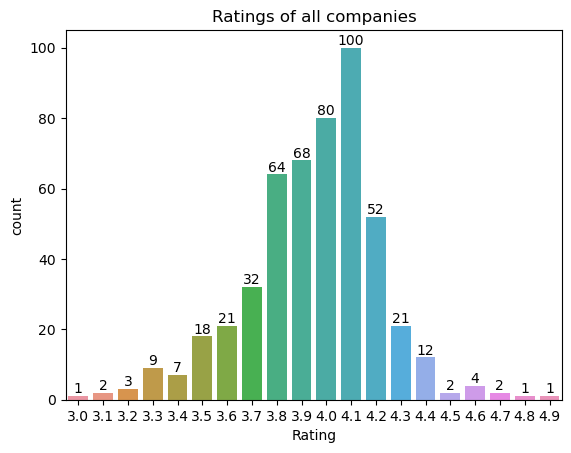

In [4]:
bc=sns.countplot(x=data["Rating"])
bc.bar_label(bc.containers[0], fontsize=10)
plt.title("Ratings of all companies")
plt.show()

In [3]:
data.loc[data["Rating"]>=4.5,"Name"]

27                iEnergizer
36     AU Small Finance Bank
63               Indian Army
189         Indian Air Force
215           Paras Hospital
238         Marpu Foundation
368         Kalyan Jewellers
415      Taurus BPO Services
428              Indian Navy
468           PHN Technology
Name: Name, dtype: object

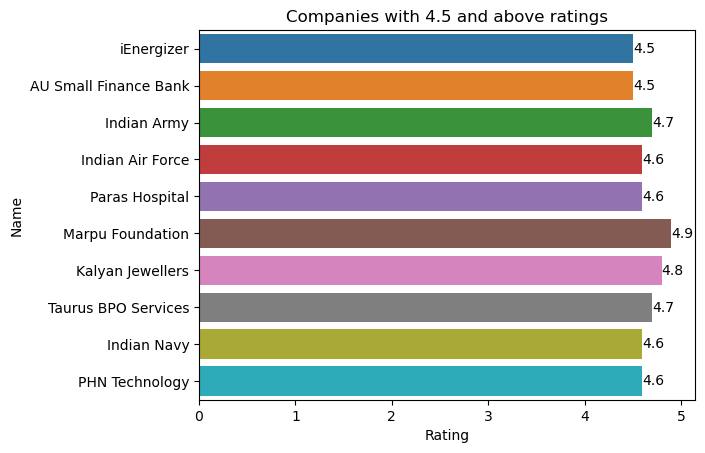

In [5]:
we=sns.barplot(x=data.loc[data["Rating"]>=4.5,"Rating"],y=data.loc[data["Rating"]>=4.5,"Name"])
we.bar_label(we.containers[0], fontsize=10)
plt.title("Companies with 4.5 and above ratings")
plt.show()

### Companies are highly rated for

In [5]:
lst=['Company Culture', 'Job Security', 'Promotions / Appraisal', 'Salary & Benefits', 'Skill Development / Learning',
      'Work Life Balance', 'Work Satisfaction']
len(lst)

7

In [6]:
hr=[]
for i in lst:
    c=0
    for j in range(0,500):
        if i in data["Highly Rated For"][j]:
            c+=1
    print(c)
    hr.append(c)

241
277
2
81
219
169
14


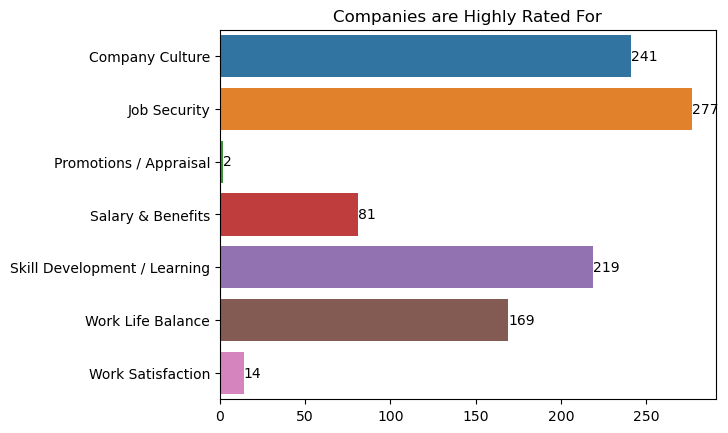

In [8]:
fg=sns.barplot(x=hr,y=lst)
fg.bar_label(fg.containers[0], fontsize=10)
plt.title("Companies are Highly Rated For")
plt.show()

### Companies that are critically rated for 

In [9]:
lst9=["Job Security","Promotions / Appraisal","Salary & Benefits"]
len(lst9)

3

In [10]:
cr=[]
for i in lst9:
    c=0
    for j in range(0,500):
        if i in data["Critically Rated For"][j]:
            c+=1
    print(c)
    cr.append(c)

9
33
11


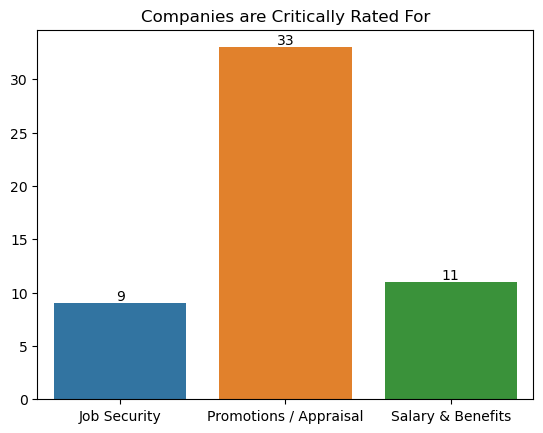

In [11]:
hi=sns.barplot(x=lst9,y=cr)
hi.bar_label(hi.containers[0], fontsize=10)
plt.title("Companies are Critically Rated For")
plt.show()

### Company Reviews

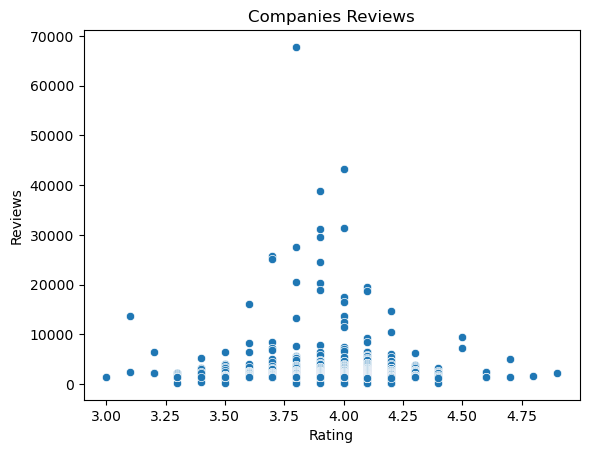

In [3]:
sns.scatterplot(x=data["Rating"],y=data["Reviews"])
plt.title("Companies Reviews")
plt.show()

## Salary Insights

In [135]:
a=data.loc[data["Salaries"]>=100000, ["Name","Salaries","Jobs"]]
a

,Name,Salaries,Jobs
0,TCS,739300,473
1,Accenture,514500,5100
2,Cognizant,497800,562
3,Wipro,371700,346
4,ICICI Bank,136600,215
5,HDFC Bank,123500,467
6,Infosys,414100,544
7,Capgemini,337200,561
8,Tech Mahindra,236700,1100
9,HCLTech,254600,627


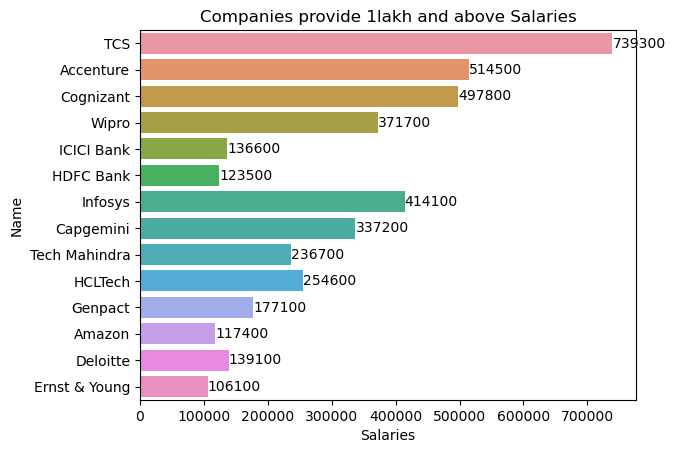

In [127]:
de=sns.barplot(x=a["Salaries"], y=a["Name"])
de.bar_label(de.containers[0], fontsize=10)
plt.title("Companies provide 1lakh and above Salaries")
plt.show()

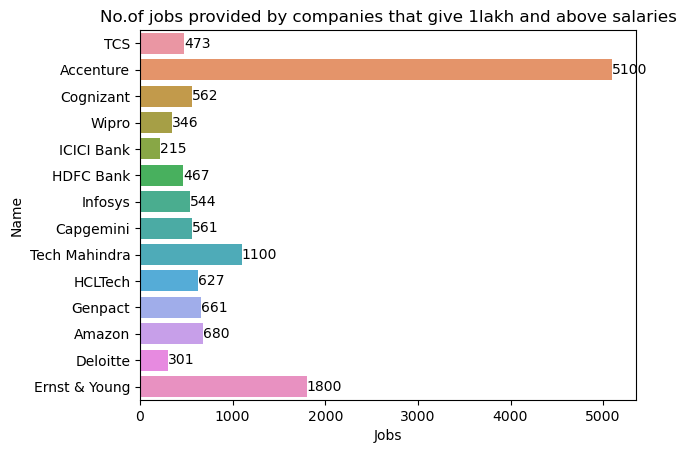

In [134]:
de=sns.barplot(x=a["Jobs"], y=a["Name"])
de.bar_label(de.containers[0], fontsize=10)
plt.title("No.of jobs provided by companies that give 1lakh and above salaries")
plt.show()

In [108]:
lst1=[]
lst2=[]
for i in range(0,110,10):
    if i==100:
        print(len(data.loc[(data["Salaries"]>(i*1000))]),">",i)
        lst1.append(len(data.loc[(data["Salaries"]>(i*1000))]))
        lst2.append(">100000")
    else:
        print(len(data.loc[(data["Salaries"]>(i*1000)) & (data["Salaries"]<((i+10)*1000))]),i,"-",i+10)
        lst1.append(len(data.loc[(data["Salaries"]>(i*1000)) & (data["Salaries"]<((i+10)*1000))]))
        lst2.append(str(i)+"-"+str(i+10))

270 0 - 10
139 10 - 20
42 20 - 30
9 30 - 40
9 40 - 50
7 50 - 60
6 60 - 70
3 70 - 80
0 80 - 90
1 90 - 100
14 > 100


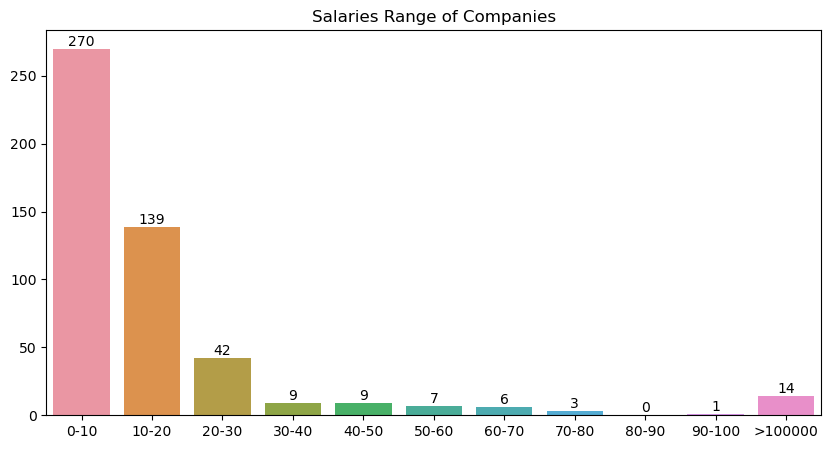

In [111]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x=lst2,y=lst1)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Salaries Range of Companies")
plt.show()